In [24]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
client = MongoClient()
collection = client['goods']['bra2']
data = list(collection.find())
df = pd.DataFrame(data)
df.head(20)

,_id,content,date,golduser,info
0,5ce90cc69f60af09c46d1054,买了肤色的，一直穿他们家的，尺码合适，款式舒适度都非常不错，夏天穿很合适，,2019-05-23 09:56:17,True,颜色分类:110|肤色;尺码:80B
1,5ce90cc79f60af09c46d1055,第一次买这个牌子，试了一下，穿的蛮舒服，聚拢效果不是很好，习惯好评。,2019-05-22 17:35:37,False,颜色分类:020|黑色;尺码:80B
2,5ce90cc79f60af09c46d1056,这是刚买的下水洗过的效果，吊牌还在呢，带子就变成这样了，和在实体店买的真是天壤之别，网购还真...,2019-05-18 14:14:13,True,颜色分类:150|卡其色|;尺码:75A
3,5ce90cc79f60af09c46d1057,送给妻子的520礼物。她说穿上很舒服,2019-05-21 07:32:04,False,颜色分类:100|粉色;尺码:75B
4,5ce90cc79f60af09c46d1058,与实体店的一样质量，还便宜一些。,2019-05-20 17:37:52,True,颜色分类:110|肤色;尺码:80B
5,5ce90cc79f60af09c46d1059,试穿了一下，舒服，内衣是薄杯，更适合夏天吧。,2019-05-23 20:15:16,False,颜色分类:110|肤色;尺码:75B
6,5ce90cc79f60af09c46d105a,买了好几个了，厚薄度正好，夏天穿白衣里面搭穿这个肤色的很合适。,2019-05-20 17:38:16,False,颜色分类:110|肤色;尺码:75C
7,5ce90cc79f60af09c46d105b,第二次购买了，舒服，不约束，想没穿一样的自由自在,2019-05-16 06:02:30,True,颜色分类:110|肤色;尺码:80A
8,5ce90cc79f60af09c46d105c,回购第N件了，每年都回购无刚圈的，我现在已经完全不想穿带刚圈的了,2019-05-23 07:58:04,False,颜色分类:100|粉色;尺码:75C
9,5ce90cc79f60af09c46d105d,买给妈妈穿的，无钢圈，说很舒服,2019-05-21 10:43:55,True,颜色分类:110|肤色;尺码:75B


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4220 entries, 0 to 4219
Data columns (total 5 columns):
_id         4220 non-null object
content     4220 non-null object
date        4220 non-null object
golduser    4220 non-null bool
info        4220 non-null object
dtypes: bool(1), object(4)
memory usage: 136.1+ KB


### 数据清理

In [28]:
def get_color(x):
    x = x.split(';')[0].split('|')
    if len(x)<2:
        x = np.nan
    else:
        x = x[1]
    return x
df['color'] = df['info'].apply(get_color)

In [30]:
df.head()

,_id,content,date,golduser,info,color
0,5ce90cc69f60af09c46d1054,买了肤色的，一直穿他们家的，尺码合适，款式舒适度都非常不错，夏天穿很合适，,2019-05-23 09:56:17,True,颜色分类:110|肤色;尺码:80B,肤色
1,5ce90cc79f60af09c46d1055,第一次买这个牌子，试了一下，穿的蛮舒服，聚拢效果不是很好，习惯好评。,2019-05-22 17:35:37,False,颜色分类:020|黑色;尺码:80B,黑色
2,5ce90cc79f60af09c46d1056,这是刚买的下水洗过的效果，吊牌还在呢，带子就变成这样了，和在实体店买的真是天壤之别，网购还真...,2019-05-18 14:14:13,True,颜色分类:150|卡其色|;尺码:75A,卡其色
3,5ce90cc79f60af09c46d1057,送给妻子的520礼物。她说穿上很舒服,2019-05-21 07:32:04,False,颜色分类:100|粉色;尺码:75B,粉色
4,5ce90cc79f60af09c46d1058,与实体店的一样质量，还便宜一些。,2019-05-20 17:37:52,True,颜色分类:110|肤色;尺码:80B,肤色


### 偏爱的颜色

In [33]:
df['color'].value_counts()

肤色     1746
黑色     1086
粉色      684
卡其色     357
绿色      202
粉色2     135
红色2       5
红色        4
Name: color, dtype: int64

In [36]:
def switch_red(x):
    if x == '红色2':
        x = '红色'
    return x
df['color'] = df['color'].apply(switch_color)

def switch_pink(x):
    if x == '粉色2':
        x = '粉色'
    return x
df['color'] = df['color'].apply(switch_pink)

In [46]:
color_counts = df['color'].value_counts()
color_counts

肤色     1746
黑色     1086
粉色      819
卡其色     357
绿色      202
红色        9
Name: color, dtype: int64

### 绘图

In [48]:
[z for z in zip(color_counts.index,color_counts.values)]

[('肤色', 1746), ('黑色', 1086), ('粉色', 819), ('卡其色', 357), ('绿色', 202), ('红色', 9)]

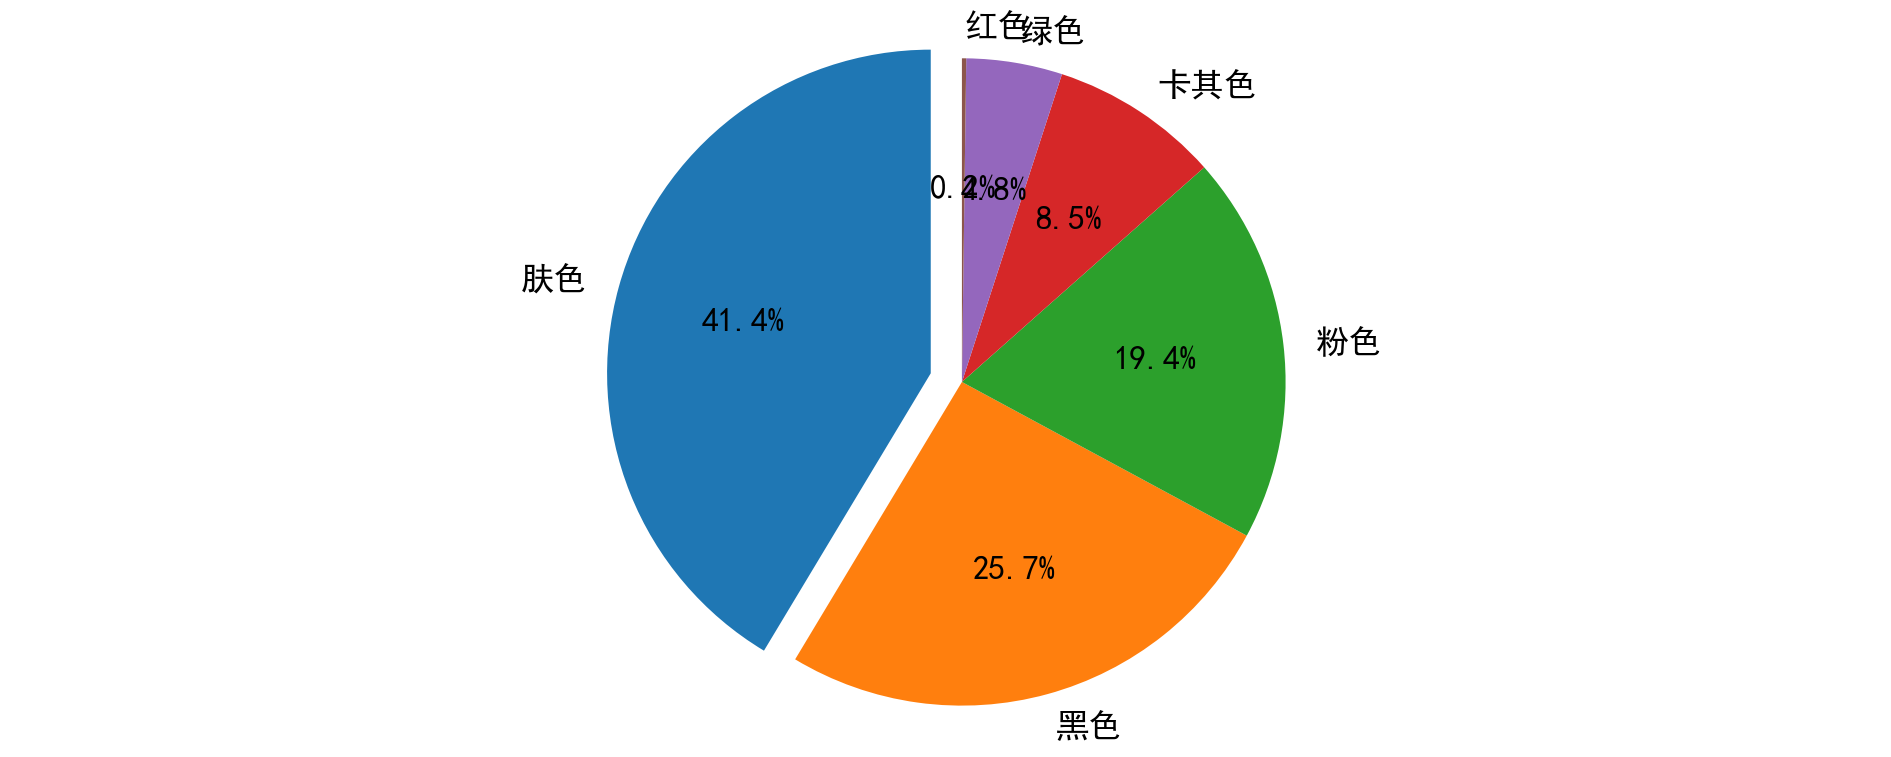

In [56]:
from matplotlib import pyplot as plt
import matplotlib
plt.figure(figsize=(20,8),dpi=120)
#设定中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
#每块饼的名称
labels = color_counts.index
#每块饼的大小
size = color_counts.values
#哪一块突出
explode = (0.1,0,0,0,0,0)

plt.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
#表示让饼图呈竖直角度
plt.axis('equal')
plt.show()

### 获取尺寸

In [70]:
import re
def get_size(x):
    x = re.findall('.*?([ABCDEFG])',x)[0]
    return x
df['size'] = df['info'].apply(get_size)
size_counts = df['size'].value_counts()
size_counts

B    2249
A    1469
C     502
Name: size, dtype: int64

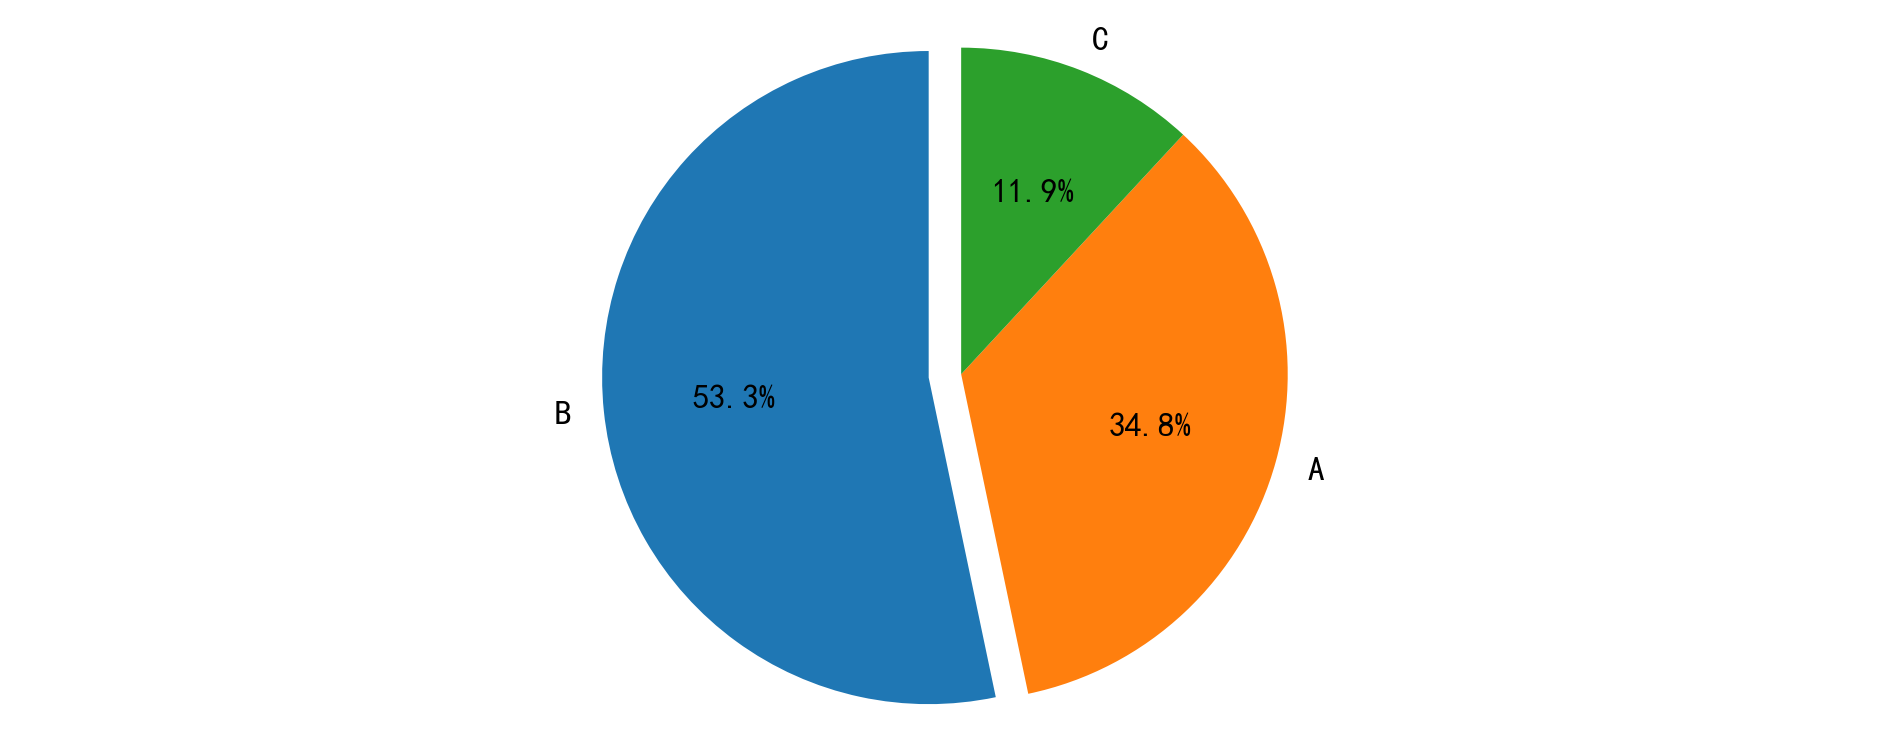

In [71]:
from matplotlib import pyplot as plt
import matplotlib
plt.figure(figsize=(20,8),dpi=120)
#设定中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
#每块饼的名称
labels = size_counts.index
#每块饼的大小
size = size_counts.values
#哪一块突出
explode = (0.1,0,0)

plt.pie(size,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
#表示让饼图呈竖直角度
plt.axis('equal')
plt.show()

In [73]:
df['golduser'].value_counts()

True     2464
False    1756
Name: golduser, dtype: int64

In [74]:
# with open('E:/conment.txt') as f:
#     f.write()

In [95]:
f = open('E:/comment.txt','ab')
for i in df['content']:
    f.write(i.encode('utf-8'))
    f.write(b'\n')
f.close()

In [111]:
import jieba
txt = open('E:/comment.txt','r',encoding='utf-8').read()
words = jieba.lcut(txt)
print(type(words))
print(len(words))
#print(words[:10])
word_counts = {}
for word in words:
    word_counts[word] = word_counts.get(word,0) + 1
excludes = ['了','的','，',',','。','\n','！',' ','是','很','我','也','穿','还','这','和','就','有','会','都']
for word in excludes:
     del word_counts[word]
items = list(word_counts.items())
items.sort(key=lambda x:x[1],reverse=True)
items[:30]

<class 'list'>
88580


[('好', 4787),
 ('回购', 3236),
 ('好好', 3165),
 ('买', 1197),
 ('舒服', 1190),
 ('不错', 991),
 ('活动', 531),
 ('不', 496),
 ('非常', 492),
 ('穿着', 453),
 ('再', 424),
 ('评论', 383),
 ('喜欢', 361),
 ('哈哈哈', 354),
 ('没有', 344),
 ('合适', 329),
 ('好评', 319),
 ('满意', 294),
 ('比较', 286),
 ('不会', 281),
 ('一般', 264),
 ('优惠', 264),
 ('钢圈', 258),
 ('大家', 256),
 ('聚拢', 250),
 ('试', 242),
 ('宝贝', 242),
 ('为了', 235),
 ('同事', 233),
 ('一直', 230)]

In [112]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
word = WordCloud()
word.add('',items[:20],word_size_range=[20, 100])
word.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud展示"))
word.render_notebook()